<a href="https://colab.research.google.com/github/magarclaf/E-Card/blob/master/practica5_adicional2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 5. Ejercicio adicional 2. Regresión

Hasta ahora, tanto en teoría como en práctica, nos hemos centrado en una tarea del aprendizaje supervisado que es la clasificación. En este notebook vamos a ver otra clase de aprendizaje automático que es la regresión.

Los modelos de regresión sirven para predecir variables en una escala continua, lo que los hace muy atractivos en distintas áreas científicas e industriales. Un ejemplo de análisis de regresión consiste en ser capaz de predecir las ventas que una compañía tendrá el próximo mes.

En este notebook veremos los distintos conceptos que son necesarios para la regresión.

Este notebook está basado en el libro "Python Machine Learning" de R. S. Olson.

## Introduciendo un modelo regresión lineal simple

El objetivo de la regresión lineal simple es modelar la relación entre un único descriptor (variable explicatoria $x$) y un valor continuo llamado respuesta (variable objetivo $y$). La ecuación de un modelo lineal con una variable explicatoria se define como:
$$y=w_0+w_1x$$

Nuestro objetivo es aprender los pesos ($w_0$ y $w_1$) de la ecuación lineal para describir la relación lineal entre la variable explicatoria y la variable objetivo. Una vez aprendidos dichos pesos, la ecuación puede usarse para predecir respuestas de nuevas variables explicatorias que no eran parte del dataset de entrenamiento.

Basándonos en la ecuación lineal que hemos definido previamente, la regresión lineal puede entenderse como el proceso de encontrar la mejor linea recta que pasa a través de los puntos del modo que se muestra en la siguiente figura.

<img src="https://github.com/IA1920/Images/blob/master/images/regresion.png?raw=1" />

La línea que mejor se ajusta se conoce como **línea de regresión**, y las líneas verticales que van desde la línea de regresión a los puntos de la muestra se llaman **desplazamientos** o residuos, y representan el error de nuestra predicción.

El caso especial de una única variable explicatoria se conoce como **regresión lineal simple**, pero el modelo se puede generalizar a múltiples variables explicatorias. A dicho proceso se le conce como **regresión lineal múltiple**.
$$y=\sum_{i=0}^m w_ix_i$$


## Explorando el dataset de las casas

Antes de introducir nuestro primer modelo de regresión, vamos a introducir un nuevo dataset que es el dataset de las casas, que contiene información sobre distintas casas en el área de Bostón recogidas en 1978. Este dataset puede descargarse desde https://archive.ics.uci.edu/ml/machine-learning-databases/housing

##### Ejercicio

Visita el enlace anterior y busca en el fichero housing.names los atributos que se consideran en este dataset. Edita la siguiente celda con tu respueta.

In [1]:
'''
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
'''

"\n    1. CRIM      per capita crime rate by town\n    2. ZN        proportion of residential land zoned for lots over\n                 25,000 sq.ft.\n    3. INDUS     proportion of non-retail business acres per town\n    4. CHAS      Charles River dummy variable (= 1 if tract bounds\n                 river; 0 otherwise)\n    5. NOX       nitric oxides concentration (parts per 10 million)\n    6. RM        average number of rooms per dwelling\n    7. AGE       proportion of owner-occupied units built prior to 1940\n    8. DIS       weighted distances to five Boston employment centres\n    9. RAD       index of accessibility to radial highways\n    10. TAX      full-value property-tax rate per $10,000\n    11. PTRATIO  pupil-teacher ratio by town\n    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks\n                 by town\n    13. LSTAT    % lower status of the population\n    14. MEDV     Median value of owner-occupied homes in $1000's\n"

El objetivo de la regresión en este problema es ser capaz de predecir el precio medio (atributo ```MEDV```) a partir del resto de los atributos.

Antes de continuar, vamos a cargar el dataset en un ```DataFrame``` de ```pandas```.

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None,sep='\s+')
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualizando las características importantes del dataset

Como hemos visto en prácticas anteriores, el análisis exploratorio de datos (AED) suele ser el primer paso antes de entrenar un modelo de aprendizaje. En el resto de este apartado veremos algunas técnicas útiles de AED que pueden ayudar a detectar la presencia de [valores atípicos](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico), la distribución de los datos, y las relaciones entre los descriptores.

El primer paso va a consistir en crear un [diagrama de dispersión](https://en.wikipedia.org/wiki/Scatter_plot) que nos va a ayudar a visualizar las correlaciones entre pares de atributos.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


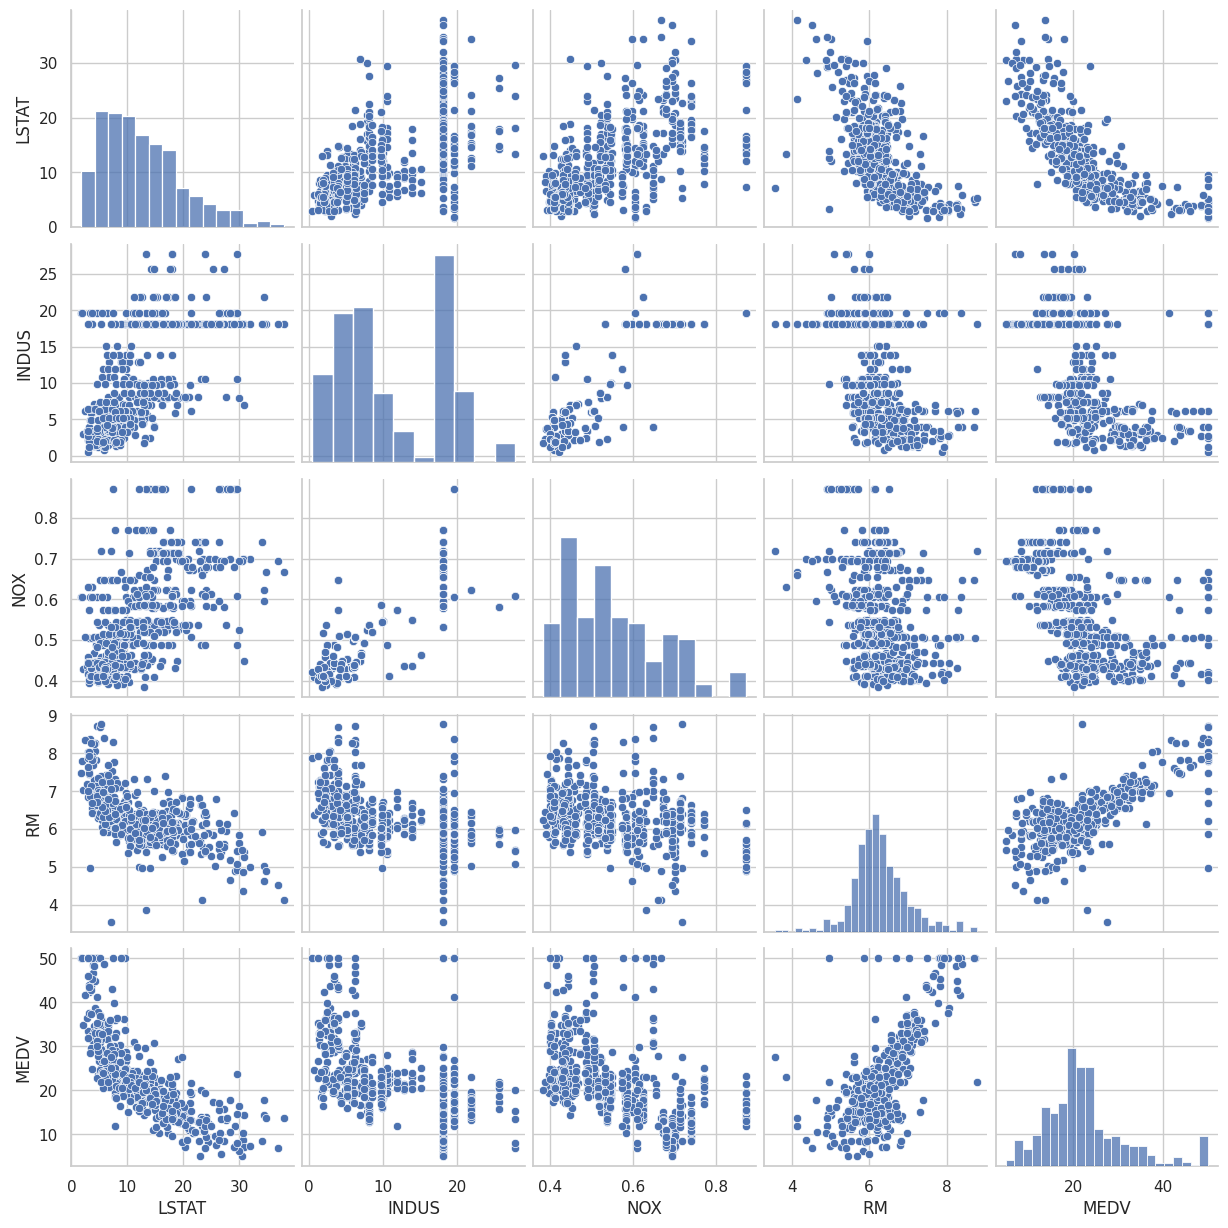

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],size=2.5)
plt.show()

En el diagrama anterior hemos considerado 5 de los atributos del dataset: 'LSTAT', 'INDUS', 'NOX', 'RM'y 'MEDV'. Los elementos de la diagonal muestran los [histogramas](https://en.wikipedia.org/wiki/Histogram) de cada variable. El resto de gráficos representan la relación entre dos de las variables (por ejemplo en la fila 1, columna 3, se muestra la relación entre las variables 'LSTAT' y 'NOX').

Usando el anterior diagrama de dispersión podemos ver cómo se distribuyen los datos y si existen valores atípicos. Por ejemplo, podemos ver que existe una relación lineal entre el atributo 'RM' (el número medio de habitaciones) y el precio medio de las casas 'MEDV' (ver quinta columna, cuarta fila). Además, podemos ver en el histograma de MEDV que la variable 'MEDV' sigue una normal, pero que contiene varios valores atípicos.

##### Ejercicio

Crea un diagrama de dispersión para los atributos: 'TAX','PTRATIO','B','LSTAT','MEDV'.

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


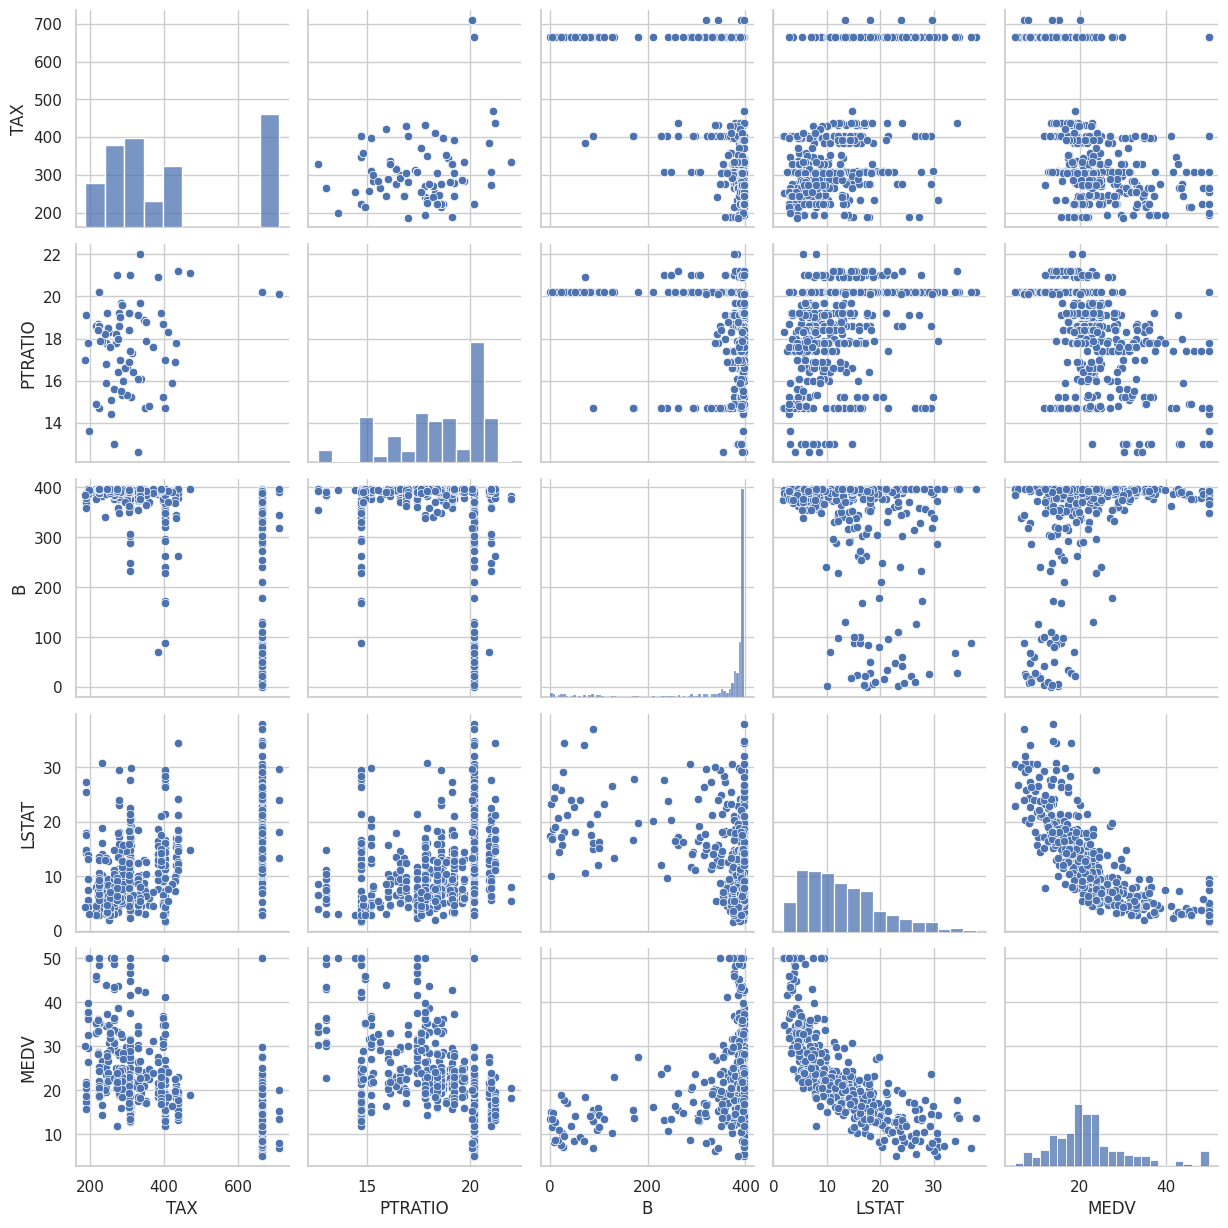

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
cols2 = ['TAX','PTRATIO','B','LSTAT','MEDV']
sns.pairplot(df[cols2],size=2.5)
plt.show()

Para cuantificar la relación lineal entre descriptores, se suele utilizar una matriz de correlación. Una matriz de correlación está muy relacionada con la matriz de convarianza utilizada para el algoritmo de análisis de componentes principales.

La matriz de correlación es una matriz cuadrada que contiene los coeficientes de correlación de Pearson, que sirven para medir la dependencia entre pares de descriptores. El [coeficiente de correlación de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) toma valores entre -1 y 1. Dos descriptores tienen una perfecta correlación positiva (dos atribuos tienen una correlación positiva si al aumentar el valor de un atributo, el otro también aumenta) si el coeficiente de correlación de Pearson vale 1, no tienen correlación (dos atribuos no tienen correlación si el valor de un atributo no influye en el otro) si vale 0, y una perfecta correlación negativa (dos atribuos tienen una correlación negativa si al aumentar el valor de un atributo, el otro disminuye de manera proporcional) si vale -1.

En el siguiente código se muestra como se puede visualizar la matriz de correlación entre los atributos indicados anteriormente usando un mapa de calor.

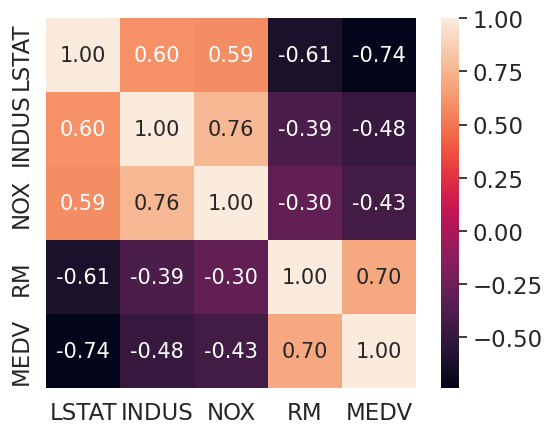

In [7]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,
                 square=True,fmt='.2f',annot_kws={'size':15},
                 yticklabels=cols,xticklabels=cols)
plt.show()

##### Ejercicio
A partir del diagrama anterior ¿qué atributos tienen una correlación positiva con el atributo 'MEDV'? ¿y negativa?

In [ ]:
'''
Corelacción positiva: RM (0.7)
Correlacción negativa: LSTAT (-0.74), INDUS (-0.48), NOX (-0.43)
'''

Para entrenar un modelo de regresión lineal nos interesan aquellos atributos que tengan una alta correlación con nuestra variable objetivo 'MEDV'. A partir de la matriz anterior se puede ver que nuestra variable MEDV muestra una mayor correlación con la variable LSTAT, pero a partir de los diagramas de dispersión vimos que había una clara correlación entre las variable RM y MEDV, por lo que usaremos dicha variable para crear nuestro modelo de regresión simple.

## Estimando los coeficientes de un modelo de regresión simple usando sklearn

La librería ```sklearn``` proporciona la funcionalidad necesaria para entrenar un modelo de regresión simple. Empezamos cargando la funcionalidad necesaria.

In [8]:
from sklearn.linear_model import LinearRegression

Almacenamos la variable explicatoria RM y la variable objetivo MEDV en las variables ```X``` e ```y``` respectivamente.

In [9]:
X = df[['RM']].values
y = df[['MEDV']].values

##### Ejercicio

Al igual que para los modelos de clasificación es importante partir el dataset en un conjunto de entrenamiento y en otro de test. Para ello puedes utilizar la función ```train_test_split``` de la librería ```sklearn``` como vimos en la primera parte de la práctica. Modifica el código de la siguiente celda para considerar el 25% del dataset como conjunto de test.

In [10]:
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test) = train_test_split(X, y, test_size=0.25, random_state=42)

Creamos nuestro modelo de regresión y lo entrenamos.

In [11]:
slr = LinearRegression()
slr.fit(X_train,y_train)

LinearRegression()

A continuación mostramos la línea de regresión que se ha construido.

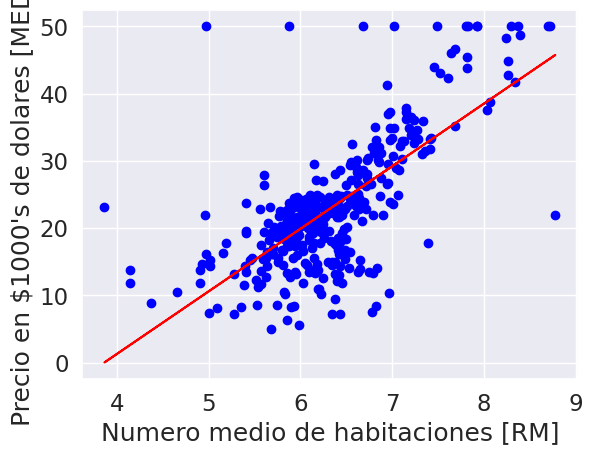

In [12]:
plt.scatter(X_train,y_train,c='blue')
plt.plot(X_train,slr.predict(X_train),color='red')
plt.xlabel('Numero medio de habitaciones [RM]')
plt.ylabel('Precio en $1000\'s de dolares [MEDV]')
plt.show()

## Evaluando nuestro modelo

La última tarea a realizar consiste en evaluar lo "bueno" que es nuestro modelo. Al contrario que en la clasificación, en un modelo de regresión no solo nos interesa si el modelo de predicción ha acertado la categoría del objeto, sino, más bien, lo cerca que esta la predicción de la realidad.

En los modelos de regresión se utiliza una métrica llamada **error cuadrado medio** (MSE de las siglas en inglés mean squared error) que es la media de los desplazamientos de cada instancia de nuestro dataset. Esto viene dado por la fórmula:
$$MSE=\frac{1}{n}\sum_{i=1}^n (y^{(i)} - \hat{y}^{(i)})^2$$
donde $n$ es el tamaño del dataset, $y^{(i)}$ es el valor esperado para la instancia $i$ del dataset, e $\hat{y}^{(i)}$ es el devuelto por el modelo para la instancia $i$ del dataset.

La librería ```sklearn``` proporciona la funcionalidad necesaria para calcular este valor, tanto para el conjunto de entrenamiento como para el de test.

In [13]:
from sklearn.metrics import mean_squared_error

Realizamos la predicción utilizando el modelo tanto para el conjunto de entrenamiento como para el de test.

In [14]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Mostramos el resultado de calcular los valores MSE para los dos conjuntos.

In [15]:
print('Valor MSE entrenamiento: %.3f, valor MSE test: %.3f' %
      (mean_squared_error(y_train,y_train_pred),
      mean_squared_error(y_test,y_test_pred)))

Valor MSE entrenamiento: 43.913, valor MSE test: 42.750


Cuanto más cercano a cero este el valor MSE para el conjunto de test, mejor será el modelo.

##### Ejercicio

Construye un modelo de regresión lineal simple utilizando el atributo LSTAT, en lugar del RM. Calcula el valor MSE test para dicho modelo. Al hacer la partición del dataset, utiliza el mismo estado aleatorio que antes para que los resultados sean comparables (¿por qué es esto necesario?)

In [18]:
from sklearn.model_selection import train_test_split
X = df[['LSTAT']].values
y = df[['MEDV']].values
(X_train,X_test,y_train,y_test) = train_test_split(X, y, test_size=0.25, random_state=42)
slr = LinearRegression()
slr.fit(X_train,y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)
print('Valor MSE entrenamiento: %.3f, valor MSE test: %.3f' %
      (mean_squared_error(y_train,y_train_pred),
      mean_squared_error(y_test,y_test_pred)))

Valor MSE entrenamiento: 39.621, valor MSE test: 35.508


¿Se obtienen mejores o peores resultados con el modelo anterior?

Este último obtiene mejores resultados (35.508 > 42.750 porque esta más cerca del 0)

## Modelo de regresión lineal múltiple

Ya por último vamos a ver cómo utilizar todas las variables para construir un modelo de regresión lineal múltiple.

Comenzamos definiendo nuestras X e y.

In [19]:
X = df.iloc[:,:-1].values
y = df['MEDV'].values

Partimos el dataset (modifica el random_state para hacer la misma división que antes).

In [21]:
(X_train,X_test,y_train,y_test) =train_test_split(X,y,test_size=0.25, random_state=42)

Construimos el modelo y lo entrenamos.

In [22]:
slr = LinearRegression()
slr.fit(X_train,y_train)

LinearRegression()

Realizamos las predicciones.

In [23]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Y por último, evaluamos los resultados del modelo.

In [24]:
print('Valor MSE entrenamiento: %.3f, valor MSE test: %.3f' %
      (mean_squared_error(y_train,y_train_pred),
      mean_squared_error(y_test,y_test_pred)))

Valor MSE entrenamiento: 22.340, valor MSE test: 22.099


##### Ejercicio

¿Hemos obtenido mejores resultados con este modelo que con los anteriores?

Bastante mejores con este modelo (22.099 > 35.508 > 42.750 porque esta más cerca del 0)

## Entrega

Recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.